In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
file_path = 'variant_summary.clean.PRPH2'
data = pd.read_csv(file_path, delimiter='\t')

data.head()

,gene,var_type,consequence,significance,origin,transcript,aa_ref,pos_aa,aa_alt,id,diseases,key
0,PRPH2,Microsatellite,deletion,Pathogenic/Likely pathogenic,germline,NM_000322.5,Cys,119,del,CV:28201,Retinitis pigmentosa 7|not provided,6;42689715;42689717;na;na
1,PRPH2,single nucleotide variant,missense,Pathogenic,germline;inherited;unknown,NM_000322.5,Pro,216,Leu,CV:28203,Retinitis pigmentosa 7|not provided|PRPH2-rela...,6;42672284;42672284;na;na
2,PRPH2,single nucleotide variant,missense,Pathogenic/Likely pathogenic,germline,NM_000322.5,Leu,185,Pro,CV:28204,"Retinitis pigmentosa 7, digenic|not provided|L...",6;42689519;42689519;na;na
3,PRPH2,single nucleotide variant,missense,Pathogenic/Likely pathogenic,germline;unknown,NM_000322.5,Arg,172,Gln,CV:28206,"Choroidal dystrophy, central areolar 2|not pro...",6;42689558;42689558;na;na
4,PRPH2,single nucleotide variant,stop_gain,Pathogenic,germline,NM_000322.5,Tyr,258,Ter,CV:28207,not provided|Vitelliform macular dystrophy 3,6;42672157;42672157;na;na


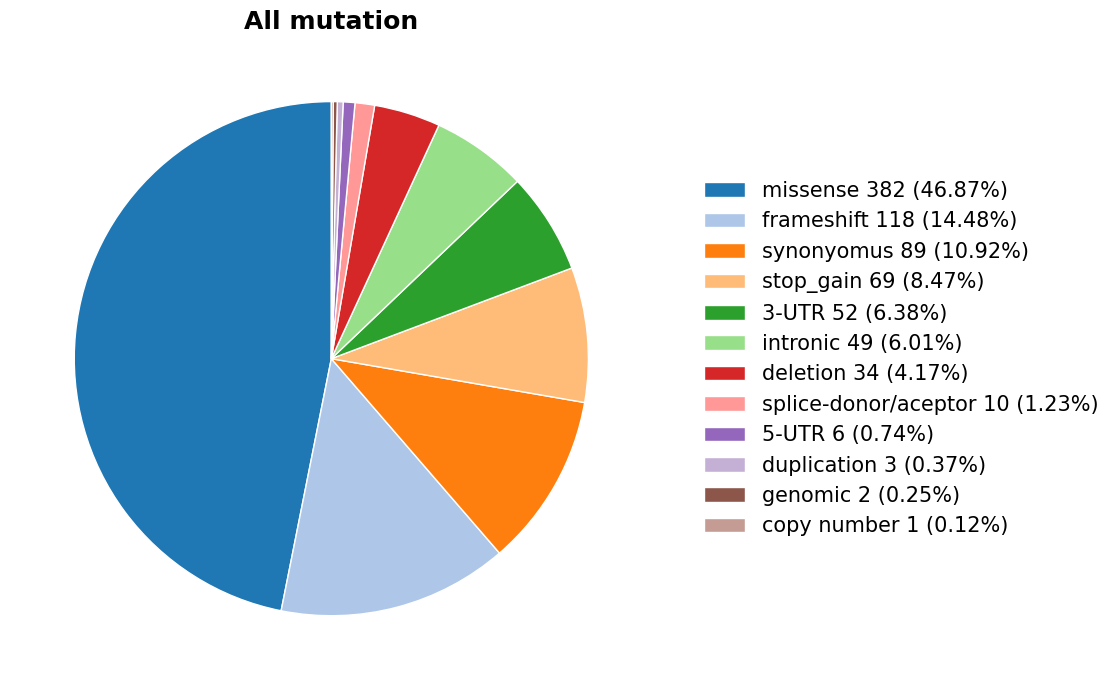

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [7]:
import matplotlib.pyplot as plt

# 1. Count categories in the column
counts = data["consequence"].value_counts()

labels = counts.index
sizes = counts.values

# 2. Use a large colormap for many categories
colors = plt.cm.tab20.colors   # works well for 20-30 categories

# 3. Create figure with white background
fig, ax = plt.subplots(figsize=(12, 7)) # width=12 inches, height=7 inches
fig.patch.set_facecolor("white")   # white background for figure
ax.set_facecolor("white")          # white background for plot

# 4. Draw the pie chart
wedges, texts = ax.pie(
    sizes,
    colors=colors,
    startangle=90,
    wedgeprops=dict(edgecolor="white"),
)

# Add title
ax.set_title("All mutation", fontsize=18, fontweight='bold')

# 5. Build legend entries: "Label count (percent%)"
legend_labels = [
    f"{label} {count} ({count/sizes.sum()*100:.2f}%)"
    for label, count in zip(labels, sizes)
]

# 6. Add legend on the right side
ax.legend(
    wedges,
    legend_labels,
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    fontsize=15,
    frameon=False,
)


# 7. Keep the pie chart circular
ax.set_aspect("equal")

plt.tight_layout()
plt.savefig("PRPH2_piechart.png", dpi=300, bbox_inches="tight")  # dpi=300 for high quality
plt.show()
plt.close